In [464]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [349]:
mnist = fetch_openml('mnist_784', version=1)

In [350]:
X = mnist.data
y = mnist.target

In [351]:
X.shape

(70000, 784)

In [352]:
some_digit = X.iloc[5]  

In [353]:
some_digit_array = some_digit.to_numpy()
some_digit_image = some_digit_array.reshape(28, 28)

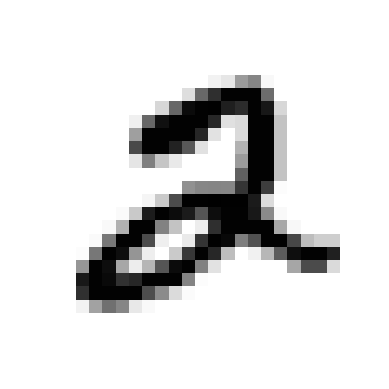

In [354]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
     interpolation="nearest")
plt.axis("off")
plt.show()

In [355]:
y[5]

'2'

In [356]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [357]:
X_train.shape

(60000, 784)

In [358]:
shuffle_index = np.random.permutation(60000)

In [359]:
X_train = X_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

In [360]:
y_train_2 = (y_train == '2')
y_test_2 = (y_test == '2')

In [361]:
y_train_2.shape

(60000,)

In [362]:
y_test_2.shape

(10000,)

In [363]:
sgd_clf = SGDClassifier(random_state=42)

In [364]:
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

In [365]:
prediction = sgd_clf.predict([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [366]:
prediction

array([ True])

In [367]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [368]:
for train_index, test_index in skfolds.split(X_train, y_train_2):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_2.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.82535
0.7567
0.82395


In [369]:
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.9611 , 0.97355, 0.9712 ])

In [370]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [371]:
never_2_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9012 , 0.90365, 0.89725])

In [372]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [373]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [374]:
confusion_matrix(y_train_2, y_train_pred)

array([[53053,   989],
       [  894,  5064]], dtype=int64)

In [375]:
precision_score(y_train_2, y_train_pred) 

0.8366099454815794

In [376]:
recall_score(y_train_2, y_train_pred) 

0.8499496475327291

In [377]:
f1_score(y_train_2, y_train_pred)

0.8432270418782782

In [378]:
y_scores = sgd_clf.decision_function([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [379]:
y_scores

array([3548.6529922])

In [380]:
threshold = 4000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [381]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,
            method="decision_function")

In [384]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [385]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

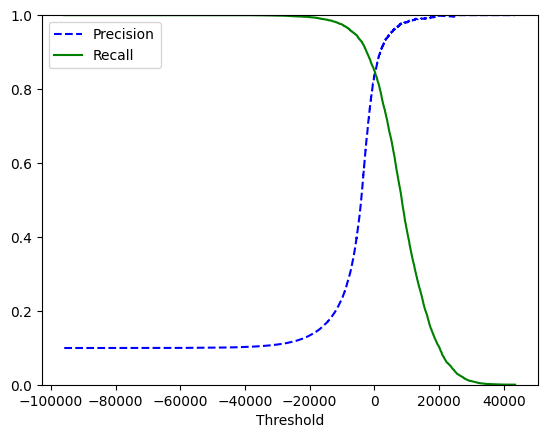

In [386]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [388]:
fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

In [389]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

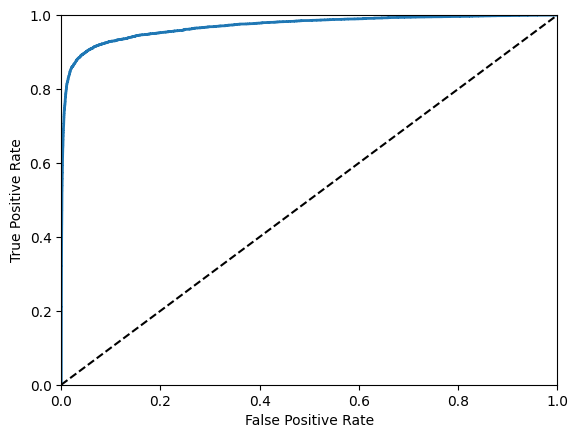

In [390]:
plot_roc_curve(fpr, tpr)
plt.show()

In [393]:
roc_auc_score(y_train_2, y_scores)

0.9704041871427963

In [394]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['2'], dtype='<U1')

In [395]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-16594.88706687, -51573.27186511,   2686.46609421,
        -10121.53396319, -18777.18931935,  -7684.39144606,
        -20785.90456665, -25446.68958361,  -3261.35350974,
         -6011.68890176]])

In [396]:
np.argmax(some_digit_scores)

2

In [397]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [401]:
sgd_clf.classes_[2]

'2'

In [403]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array(['2'], dtype=object)

In [404]:
len(ovo_clf.estimators_)

45

In [408]:
forest_clf = RandomForestClassifier()

In [409]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['2'], dtype=object)

In [411]:
forest_clf.predict_proba([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.95, 0.02, 0.  , 0.01, 0.  , 0.  , 0.  , 0.02]])

In [412]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.85225, 0.88295, 0.8785 ])

In [414]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8986, 0.9045, 0.9021])

In [415]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5601,    0,   17,    7,    9,   43,   40,    5,  200,    1],
       [   0, 6423,   45,   16,    3,   43,    5,    9,  185,   13],
       [  28,   26, 5255,   95,   68,   28,   63,   40,  345,   10],
       [  29,   19,  113, 5242,    0,  212,   24,   45,  377,   70],
       [  14,   17,   44,    9, 5242,    9,   38,   19,  287,  163],
       [  28,   25,   26,  157,   50, 4512,   82,   16,  464,   61],
       [  26,   20,   47,    3,   43,   95, 5559,    8,  117,    0],
       [  22,   18,   54,   24,   51,   13,    5, 5697,  162,  219],
       [  15,   62,   42,   95,    3,  126,   31,    8, 5426,   43],
       [  25,   22,   30,   58,  128,   36,    1,  175,  327, 5147]],
      dtype=int64)

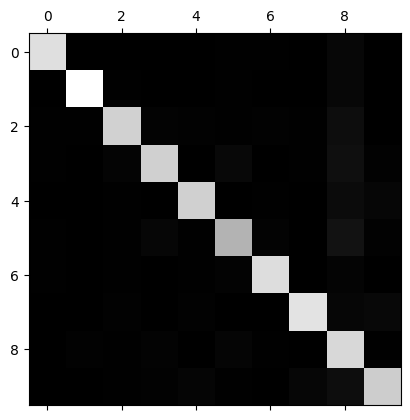

In [416]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [417]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

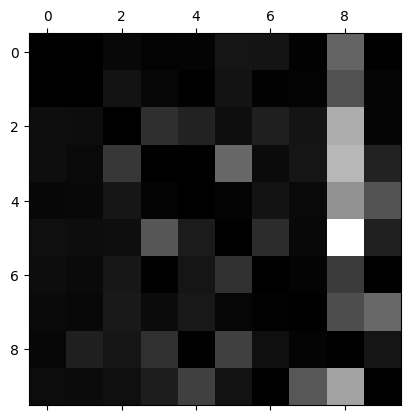

In [423]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [477]:
y_train_small = (y_train >= 2)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_small, y_train_odd]

In [478]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [479]:
knn_clf.predict([some_digit])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ True, False]])

In [480]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")


0.9682659938521935

In [483]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test